# Viga Contínua pelo Método dos Deslocamentos

Frederico Furst Bittencourt

01/05/2020

## A07ExAc2

In [1]:
from IPython.display import Image

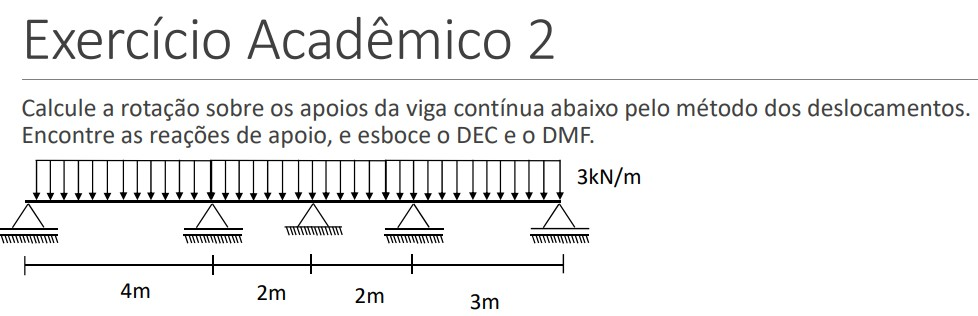

In [2]:
Image('Annotation 2020-04-27 160959.jpg')

In [3]:
import sympy as sy
import numpy as np

Numeramos as rotações sobre cada apoio, da esquerda para a direita, como sendo as deslocabilidades $D_1$, $D_2$, $D_3$, $D_4$ e $D_5$, respectivamente.

Os comprimentos de cada viga, da esquerda para a direita, são chamados de $L_1$, $L_2$, $L_3$ e $L_4$, respectivamente.

In [4]:
E,I,p,L1,L2,L3,L4 = sy.symbols('E I p L1 L2 L3 L4')

### Rigidezes

A matriz de rigidez pode ser calculada como a soma de cada uma das matrizes de rigidez referentes a cada "elemento", se considerarmos cada viga como um elemento individual.

In [5]:
stiffness1 = sy.Matrix([
    [ 4*E*I/L1, 2*E*I/L1, 0, 0, 0, ],
    [ 2*E*I/L1, 4*E*I/L1, 0, 0, 0, ],
    [ 0,        0,        0, 0, 0, ],
    [ 0,        0,        0, 0, 0, ],
    [ 0,        0,        0, 0, 0, ],
])

In [6]:
stiffness2 = sy.Matrix([
    [ 0, 0,        0,        0, 0, ],
    [ 0, 4*E*I/L2, 2*E*I/L2, 0, 0, ],
    [ 0, 2*E*I/L2, 4*E*I/L2, 0, 0, ],
    [ 0, 0,        0,        0, 0, ],
    [ 0, 0,        0,        0, 0, ],
])

In [7]:
stiffness3 = sy.Matrix([
    [ 0, 0, 0,        0,        0, ],
    [ 0, 0, 0,        0,        0, ],
    [ 0, 0, 4*E*I/L3, 2*E*I/L3, 0, ],
    [ 0, 0, 2*E*I/L3, 4*E*I/L3, 0, ],
    [ 0, 0, 0,        0,        0, ],
])

In [8]:
stiffness4 = sy.Matrix([
    [ 0, 0, 0, 0,        0,        ],
    [ 0, 0, 0, 0,        0,        ],
    [ 0, 0, 0, 0,        0,        ],
    [ 0, 0, 0, 4*E*I/L4, 2*E*I/L4, ],
    [ 0, 0, 0, 2*E*I/L4, 4*E*I/L4, ],
])

In [9]:
stiffness = stiffness1 + stiffness2 + stiffness3 + stiffness4

In [10]:
stiffness

Matrix([
[4*E*I/L1,            2*E*I/L1,                   0,                   0,        0],
[2*E*I/L1, 4*E*I/L2 + 4*E*I/L1,            2*E*I/L2,                   0,        0],
[       0,            2*E*I/L2, 4*E*I/L3 + 4*E*I/L2,            2*E*I/L3,        0],
[       0,                   0,            2*E*I/L3, 4*E*I/L4 + 4*E*I/L3, 2*E*I/L4],
[       0,                   0,                   0,            2*E*I/L4, 4*E*I/L4]])

### Termos de Carga

Cada deslocabilidade (rotação nodal) deve receber os termos de carga de elementos que se conectam a ela.

In [11]:
F1 =   p*L1**2/12
F2 = - p*L1**2/12 + p*L2**2/12
F3 =              - p*L2**2/12 + p*L3**2/12
F4 =                           - p*L3**2/12 + p*L4**2/12
F5 =                                        - p*L4**2/12

Por exemplo,

In [12]:
F2

-L1**2*p/12 + L2**2*p/12

Vetor (matriz com uma coluna) de cargas:

In [13]:
loads = sy.Matrix([
    [ F1 ],
    [ F2 ],
    [ F3 ],
    [ F4 ],
    [ F5 ],
])

Valores numéricos do vetor de carga:

In [14]:
loads.subs([
    (L1,4),
    (L2,2),
    (L3,2),
    (L4,3),
    (p,3),
])

Matrix([
[   4],
[  -3],
[   0],
[ 5/4],
[-9/4]])

### Solução

Sabe-se que a equação, escrita em forma matricial, para restaurar as condições de equilíbrio é:

$$K.d+F=0$$

Assim, os deslocamentos (rotações nodais) podem ser encontrados pela seguinte operação:

$$ d = -K^{-1}.F $$

In [15]:
inversa = stiffness.inv()

In [16]:
displacements = -inversa*loads

In [17]:
desl = displacements.subs([
    (L1,4),
    (L2,2),
    (L3,2),
    (L4,3),
    (p,3),
])

In [18]:
desl

Matrix([
[-2165/(436*E*I)],
[  421/(218*E*I)],
[ -271/(872*E*I)],
[  -75/(109*E*I)],
[3543/(1744*E*I)]])

### Valores Numéricos

Podemos avaliar os valores numéricos para constantes materiais dadas, e comparar com o resultado do Ftool.

In [19]:
desl.subs([(E,1),(I,1)]).evalf(3)

Matrix([
[ -4.97],
[  1.93],
[-0.311],
[-0.688],
[  2.03]])

### Reações de Apoio

Podemos estimar as reações de apoio, considerando uma matriz de rigidez "completa", em que poderia calcular-se também os termos energéticos referentes à energia interna de cisalhamento.

Também neste caso, numeramos as rotações sobre cada apoio, da esquerda para a direita, como sendo as deslocabilidades $D_1$, $D_2$, $D_3$, $D_4$ e $D_5$, respectivamente. No entanto, a cada reação vertical $F_1$, $F_2$, $F_3$, $F_4$ e $F_5$ correspondem os termos de força cortante relativos à rigidez de cada viga.

As reações podem ser calculadas através da superposição de duas contribuições:
1. Termos relativos à rigidez de cada viga on sistema hipergeométrico;
2. Termos de carga;

### Termos de rigidez

In [20]:
reac_stiff1 = sy.Matrix([
    [  6*E*I/L1**2,  6*E*I/L1**2, 0, 0, 0 ],
    [ -6*E*I/L1**2, -6*E*I/L1**2, 0, 0, 0 ],
    [  0,            0,           0, 0, 0 ],
    [  0,            0,           0, 0, 0 ],
    [  0,            0,           0, 0, 0 ],
])

In [21]:
reac_stiff2 = sy.Matrix([
    [ 0,  0,            0,           0, 0 ],
    [ 0,  6*E*I/L2**2,  6*E*I/L2**2, 0, 0 ],
    [ 0, -6*E*I/L2**2, -6*E*I/L2**2, 0, 0 ],
    [ 0,  0,            0,           0, 0 ],
    [ 0,  0,            0,           0, 0 ],
])

In [22]:
reac_stiff3 = sy.Matrix([
    [ 0, 0,  0,            0,           0, ],
    [ 0, 0,  0,            0,           0, ],
    [ 0, 0,  6*E*I/L3**2,  6*E*I/L3**2, 0, ],
    [ 0, 0, -6*E*I/L3**2, -6*E*I/L3**2, 0, ],
    [ 0, 0,  0,            0,           0, ],
])

In [23]:
reac_stiff4 = sy.Matrix([
    [ 0, 0, 0,  0,            0,          ],
    [ 0, 0, 0,  0,            0,          ],
    [ 0, 0, 0,  0,            0,          ],
    [ 0, 0, 0,  6*E*I/L4**2,  6*E*I/L4**2 ],
    [ 0, 0, 0, -6*E*I/L4**2, -6*E*I/L4**2 ],
])

In [24]:
reac_stiff = reac_stiff1 + reac_stiff2 + reac_stiff3 + reac_stiff4

In [25]:
reac_stiff

Matrix([
[ 6*E*I/L1**2,               6*E*I/L1**2,                         0,                         0,            0],
[-6*E*I/L1**2, 6*E*I/L2**2 - 6*E*I/L1**2,               6*E*I/L2**2,                         0,            0],
[           0,              -6*E*I/L2**2, 6*E*I/L3**2 - 6*E*I/L2**2,               6*E*I/L3**2,            0],
[           0,                         0,              -6*E*I/L3**2, 6*E*I/L4**2 - 6*E*I/L3**2,  6*E*I/L4**2],
[           0,                         0,                         0,              -6*E*I/L4**2, -6*E*I/L4**2]])

Podemos visualizar a influência que cada deslocabilidade tem nas reações de apoio:

In [26]:
D1, D2, D3, D4, D5 = sy.symbols('D1 D2 D3 D4 D5')

In [27]:
reac_stiff*sy.Matrix([
    [ D1 ],
    [ D2 ],
    [ D3 ],
    [ D4 ],
    [ D5 ],
])

Matrix([
[                                  6*D1*E*I/L1**2 + 6*D2*E*I/L1**2],
[-6*D1*E*I/L1**2 + D2*(6*E*I/L2**2 - 6*E*I/L1**2) + 6*D3*E*I/L2**2],
[-6*D2*E*I/L2**2 + D3*(6*E*I/L3**2 - 6*E*I/L2**2) + 6*D4*E*I/L3**2],
[-6*D3*E*I/L3**2 + D4*(6*E*I/L4**2 - 6*E*I/L3**2) + 6*D5*E*I/L4**2],
[                                 -6*D4*E*I/L4**2 - 6*D5*E*I/L4**2]])

### Termos de cargas

Os termos do vetor de carga correspondem ao sistema hipergeométrico quanto à superposição.

In [28]:
R1 = - p*L1/2
R2 = - p*L1/2 - p*L2/2
R3 =          - p*L2/2 - p*L3/2
R4 =                   - p*L3/2 - p*L4/2
R5 =                            - p*L4/2

In [29]:
reac_loads = sy.Matrix([
    [ R1 ],
    [ R2 ],
    [ R3 ],
    [ R4 ],
    [ R5 ],
])

In [30]:
reac_loads

Matrix([
[         -L1*p/2],
[-L1*p/2 - L2*p/2],
[-L2*p/2 - L3*p/2],
[-L3*p/2 - L4*p/2],
[         -L4*p/2]])

#### Superposição

Podemos calcular o vetor das reações fazendo:

$$R + F_R = k_R.D$$

$$R = k_R.D -F_R$$

In [31]:
reactions = reac_stiff*desl - reac_loads

Termos devidos à rigidez (sistemas $D_1$, $D_2$, $D_3$, $D_4$ e $D_5$):

In [32]:
(reac_stiff*desl).subs([
    (L1,4),
    (L2,2),
    (L3,2),
    (L4,3),
    (p,3),
]).evalf(3)

Matrix([
[ -1.14],
[  3.57],
[ -3.93],
[  2.39],
[-0.896]])

Termos devidos às cargas (sistema P hipergeométrico):

In [33]:
reac_loads.subs([
    (L1,4),
    (L2,2),
    (L3,2),
    (L4,3),
    (p,3),
]).evalf(3)

Matrix([
[-6.0],
[-9.0],
[-6.0],
[-7.5],
[-4.5]])

Fazendo a soma algébrica (os sinais são importantes):

In [34]:
reactions

Matrix([
[                                                                       L1*p/2 - 3969/(218*L1**2)],
[L1*p/2 + L2*p/2 - 813/(436*L2**2) + 6495/(218*L1**2) + 421*(6*E*I/L2**2 - 6*E*I/L1**2)/(218*E*I)],
[L2*p/2 + L3*p/2 - 450/(109*L3**2) - 1263/(109*L2**2) - 271*(6*E*I/L3**2 - 6*E*I/L2**2)/(872*E*I)],
[L3*p/2 + L4*p/2 + 10629/(872*L4**2) + 813/(436*L3**2) - 75*(6*E*I/L4**2 - 6*E*I/L3**2)/(109*E*I)],
[                                                                       L4*p/2 - 7029/(872*L4**2)]])

In [35]:
reacoes = reactions.subs([
    (L1,4),
    (L2,2),
    (L3,2),
    (L4,3),
    (p,3),
])

Note que as reações são funções dependentes dos valores de $E$ ou de $I$, já que supomos o material e a seção constantes.

In [36]:
reacoes

Matrix([
[16959/3488],
[43839/3488],
[   903/436],
[17255/1744],
[  3143/872]])

In [37]:
reacoes.evalf(3)

Matrix([
[4.86],
[12.6],
[2.07],
[9.89],
[ 3.6]])

Bons estudos!